In [37]:
import skimage
import skimage.io
import skimage.transform
import pathlib
import numpy as np
import utils
import matplotlib.pyplot as plt
image_dir = pathlib.Path("images")
impaths = [
    image_dir.joinpath("page1.png"),
    image_dir.joinpath("page2.png"),
    image_dir.joinpath("page4.png"),
    image_dir.joinpath("page6.png"),
    image_dir.joinpath("page7.png"),
    image_dir.joinpath("page8.png"),
]

In [38]:
def create_binary_image(im):
    """Creates a binary image from a greyscale image "im"

    Args:
        im ([np.ndarray, np.float]): [An image of shape [H, W] in the range [0, 1]]

    Returns:
        [np.ndarray, np.bool]: [A binary image]
    """

    # START YOUR CODE HERE ### (You can change anything inside this block)
        #This was taken from ../tutorials/frequency_domain.ipynb
    def magnitude(fft_im):
        real = fft_im.real
        imag = fft_im.imag
        return np.sqrt(real**2 + imag**2)

    #Finding fourier transformed image
    im_fft = np.fft.fft2(im)

    #Finding binary representation, setting threshold to be 50 after trial and error
    threshold = 50
    binary_im_repr = np.where(magnitude(im_fft) > threshold, 1, 0) #Changing value to 1 or 0 based on if magnitude of value is larger than threshold or not
    binary_im = binary_im_repr.astype(bool) #Actually casting to bool

    ### PRINTING ###

    # Use plt.subplot to place two or more images beside eachother
    plt.figure(figsize=(20, 4))
    # plt.subplot(num_rows, num_cols, position (1-indexed))

    # Visualize image
    plt.subplot(1, 6, 1)
    plt.title("Original image")
    plt.imshow(im, cmap="gray")

    # Visualize FFT
    plt.subplot(1, 6, 2)
    plt.title("FFT of image")
    plt.imshow(np.fft.fftshift(np.log(magnitude(im_fft) + 1)), cmap="gray")

    # Visualize binary_img
    plt.subplot(1, 6, 3)
    plt.title("Binary fourier image")
    plt.imshow(binary_im, cmap="gray") #NB! does not look like the output in the task, but gets the job done
    ### END YOUR CODE HERE ###
    return binary_im

Found angle: -21.81
Found angle: 90.00
Found angle: 26.32
Found angle: -25.82
Found angle: -68.44
Found angle: 90.00
Saving image to: image_processed\task4d.png


<Figure size 400x1200 with 0 Axes>

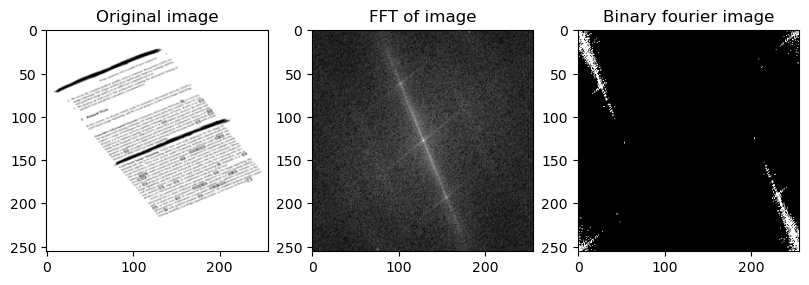

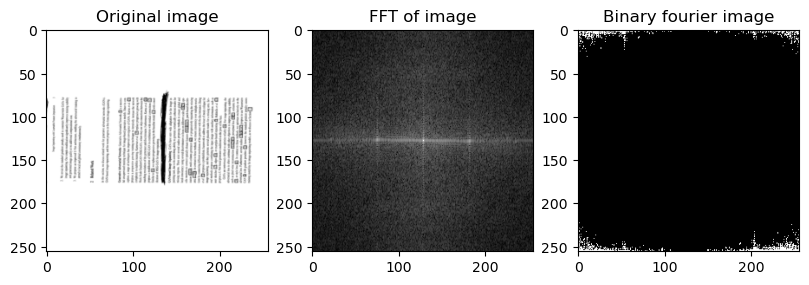

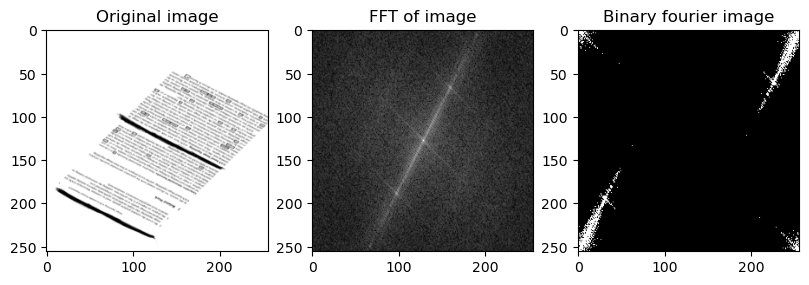

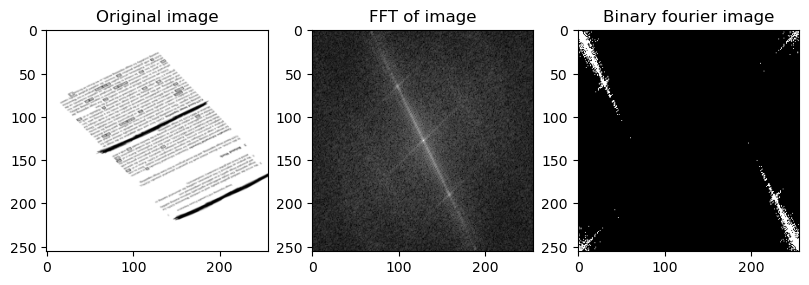

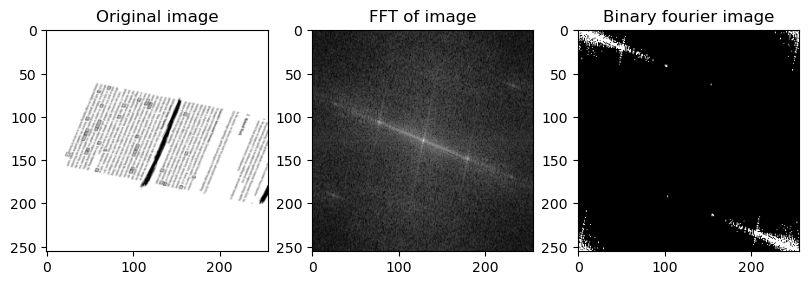

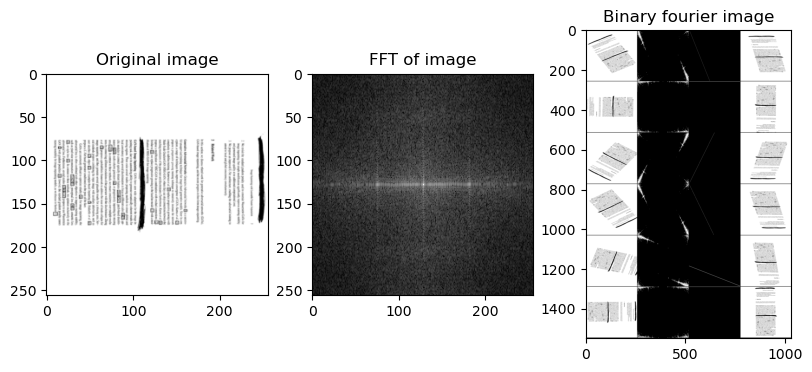

In [39]:
if __name__ == "__main__":
    # NO NEED TO EDIT THE CODE BELOW.
    verbose = True
    plt.figure(figsize=(4, 12))
    plt.tight_layout()
    images_to_visualize = []
    for i, impath in enumerate(impaths):
        im = utils.read_im(str(impath))
        im_binary = create_binary_image(im)
        assert im_binary.dtype == bool,            f"Expected the image to be of dtype np.bool, got {im_binary.dtype}"
        angles, distances = utils.find_angle(im_binary)
        angle = 0
        if len(angles) > 0:
            angle = angles[0] * 180 / np.pi
        print(f"Found angle: {angle:.2f}")
        hough_im = utils.create_hough_line_image(im, angles, distances)
        rotated = skimage.transform.rotate(im, angle, cval=im.max())
        images_to_visualize.extend(
            [im, im_binary, hough_im, rotated]
        )
    image = utils.np_make_image_grid(images_to_visualize, nrow=len(impaths))
    utils.save_im("task4d.png", image)
    plt.imshow(image, cmap="gray")